# Sprint 3 - Week 1 - Class 2

Lectura, Visualización y Preprocesamiento

En este caso de estudio, vamos a analizar el comportamiento del ranking
FIFA desde que inició su medición en el año 1993, a fin de presentar al
público la situación y el rendimiento de las distintas selecciones
nacionales afiliadas.

En este contexto, nos interesa contestar entre otras las siguientes
preguntas:

-   ¿Cómo es el rendimiento histórico por confederación?
-   ¿Cómo ha sido el rendimiento histórico de su país comparado con el
    promedio de la confederación a la cual pertenece?
-   ¿Cuáles han sido históricamente los mejores países?
-   ¿Quienes han sido los top 5 países previo al inicio de cada mundial?
    ¿Entre estos países han estado los campeones del mundo
    correspondientes?
-   Según esta puntuación, ¿las selecciones son cada vez más
    competitivas o cada vez parece existir más diferencia a través del
    tiempo?

Con este propósito usted cuenta con un conjunto de datos en el archivo
`fifa_rank.csv` cuya metadata se detalla a continuación:

-   Fuente: FIFA Site 2018
-   Dimensiones:
    -   `Country`: Nombre del pais afiliado a la FIFA cuya selección de
        fútbol es puntuada
    -   `Confederation`: Confederación a la que pertenece de acuerdo a
        la división de la FIFA
    -   `Rank_Date`: Fecha de publicación del ranking FIFA entre marzo
        de 1993 y junio de 2018 (previo al mundial de Rusia)
    -   `Points_Old_Version`: Puntos obtenidos conforme el sistema
        antiguo de la FIFA (previo al año 2011)
    -   `Ponts_New_Version`: Puntos obtenidos conforme el sistema nuevo
        de la FIFA (a partir del años 2011)
    -   `rank`: Posición en el ranking oficial de la FIFA dados los
        puntos calculados

## CARGAR LIBRERIAS Y DATOS

In [1]:
#Cargar librerias
import pandas as pd
import numpy as np

### E1: Ajustar ruta relativa según contexto

In [2]:
#Cargar datos
df_fifa = pd.read_csv("fifa_rank.csv", sep = ",")

## DIAGNÓSTICO INICIAL

In [3]:
#Visualizar información general de los datos
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57797 entries, 0 to 57796
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             57797 non-null  object 
 1   Confederation       54815 non-null  object 
 2   Rank_Date           57797 non-null  object 
 3   Points_Old_Version  40382 non-null  float64
 4   Points_New_Version  57797 non-null  object 
 5   rank                57797 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 2.6+ MB

In [4]:
#Visualizar cabecera de los datos
df_fifa.head(n = 10)

In [5]:
#Visualizar una muestra aleatoria de los datos
df_fifa.sample(n = 10)

## PROCESAMIENTO

### E2: Ajustar nombres de columnas

-   Poner todos los nombres de columnas en minusculas

In [6]:
col_originales = df_fifa.columns
col_nuevas = [col.lower() for col in col_originales]
df_fifa.columns = col_nuevas

In [7]:
df_fifa.head(10)

### E3: Visualizar datos en confederation

-   Visualizar cuantos casos hay por confederation

In [8]:
#Visualizar cuantos casos por confederation
df_fifa.groupby('confederation', dropna=False)['country'].count()

confederation
AFC         12481
CAF         14876
CONCACAF     9664
CONMEBOL     2860
UEFA        14934
NaN          2982
Name: country, dtype: int64

### E4: Ajustar formato de columna rank_date

-   Cambiar a formato fecha

In [9]:
df_fifa['rank_date'] = pd.to_datetime(df_fifa['rank_date'], infer_datetime_format=True)

C:\Users\rodon\AppData\Local\Temp\ipykernel_59532\3960985096.py:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.


In [10]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57797 entries, 0 to 57796
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             57797 non-null  object        
 1   confederation       54815 non-null  object        
 2   rank_date           57797 non-null  datetime64[ns]
 3   points_old_version  40382 non-null  float64       
 4   points_new_version  57797 non-null  object        
 5   rank                57797 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.6+ MB

### E5: Adicionar columnas de año y mes

-   Crear campo `year`
-   Crear campo `month`
-   Cuantos casos hay por cada mes y año
-   Hacer un primer grafico considerando que existen demasiados casos

In [11]:
#Campo year
df_fifa['year'] = pd.DatetimeIndex(df_fifa['rank_date']).year

#Campo month
df_fifa['month'] = pd.DatetimeIndex(df_fifa['rank_date']).month

In [12]:
df_fifa.sample(10)

In [13]:
#Visualizar cuantos casos hay por cada mes y año
df_fifa.groupby(['year','month'])['country'].count()

year  month
1993  8        167
      9        167
      10       167
      11       168
      12       168
              ... 
2018  2        211
      3        211
      4        211
      5        211
      6        211
Name: country, Length: 285, dtype: int64

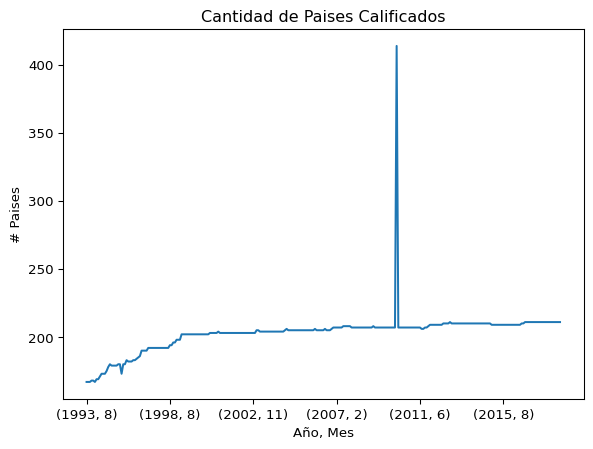

In [14]:
#Hacer un primer grafico considerando que existen demasiados casos
df_grupos_meses = df_fifa.groupby(['year','month'])['country'].count()
df_grupos_meses.plot(
    kind="line",
    xlabel="Año, Mes",
    ylabel="# Paises",
    title="Cantidad de Paises Calificados"
)

### E6: Visualizar datos en Points_Old_Version

-   Visualizar cuantos casos hay para cada valor posibles
-   Visualizar cuantos NA hay por año - mes

In [15]:
#Visualizar cuantos casos
df_fifa['points_old_version'].value_counts(dropna=False)

points_old_version
NaN       17415
0.0        1044
7.0         301
3.0         295
11.0        295
          ...  
1134.0        1
1479.0        1
999.0         1
1616.0        1
1396.0        1
Name: count, Length: 1376, dtype: int64

In [16]:
df_fifa[df_fifa['points_old_version'].isna()][['year','month']].value_counts().sort_index()

year  month
2011  8        206
      9        207
      10       207
      11       208
      12       209
              ... 
2018  2        211
      3        211
      4        211
      5        211
      6        211
Name: count, Length: 83, dtype: int64

### E7: Visualizar datos en Points_New_Version

-   Visualizar cuantos casos hay para cada valor posibles
-   Visualizar cuantos “no definidos” (ND) hay por año

In [17]:
#Visualizar cuantos casos
df_fifa['points_new_version'].value_counts(dropna=False)

points_new_version
ND        40382
0           333
63.75        48
38.25        39
66           33
          ...  
553.79        1
554.47        1
555.66        1
556.65        1
34.76         1
Name: count, Length: 11115, dtype: int64

In [18]:
df_fifa[df_fifa['points_new_version']== "ND"]['year'].value_counts().sort_index()

year
1993     837
1994    1728
1995    1792
1996    1847
1997    1916
1998    1938
1999    2416
2000    2429
2001    2437
2002    2233
2003    2450
2004    2456
2005    2461
2006    2259
2007    2489
2008    2485
2009    2484
2010    2277
2011    1448
Name: count, dtype: int64